In [1]:
import numpy as np
from sklearn import linear_model, datasets ,tree
import matplotlib.pyplot as plt
%matplotlib inline


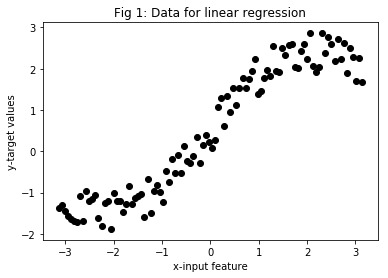

In [2]:
number_of_samples=100
x=np.linspace(-np.pi, np.pi, number_of_samples)
y=y=0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 1: Data for linear regression')
plt.show()

In [3]:
random_indicies = np.random.permutation(number_of_samples)
x_train = x[random_indicies[:70]]
y_train = y[random_indicies[:70]]
x_val = x[random_indicies[70:85]]
y_val = y[random_indicies[70:85]]
x_test = x[random_indicies[85:]]
y_test = y[random_indicies[85:]]
y_val



array([-1.55699796,  2.50737158,  0.94306039,  1.71286185,  2.72956921,
        2.57701191, -1.19428708, -0.96883088,  1.76263501,  2.86943535,
       -1.05114515,  2.04000733, -1.50022657, -0.84400024, -1.21404025])

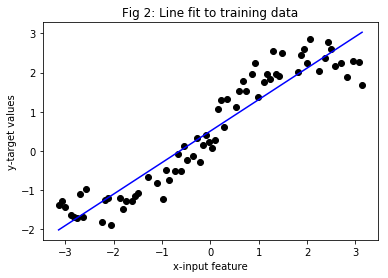

matrix([[ 0.09519978],
        [-3.14159265],
        [ 2.06266184],
        [ 1.42799666],
        [ 1.49146318],
        [ 1.23759711],
        [ 0.53946541],
        [ 3.07812614],
        [ 0.60293192],
        [-0.72986496],
        [-1.30106362],
        [ 0.98373103],
        [ 1.99919533],
        [-1.5549297 ],
        [ 0.22213281],
        [ 0.856798  ],
        [-0.34906585],
        [-0.856798  ],
        [-2.18959488],
        [-0.53946541],
        [-2.06266184],
        [ 0.03173326],
        [ 1.11066407],
        [ 2.2530614 ],
        [-0.03173326],
        [-1.11066407],
        [ 0.34906585],
        [ 2.44346095],
        [-0.66639844],
        [ 0.72986496],
        [-0.60293192],
        [-1.49146318],
        [-0.98373103],
        [ 2.69732703],
        [ 2.37999443],
        [-2.63386051],
        [-1.61839622],
        [-0.22213281],
        [-0.92026451],
        [ 1.93572881],
        [ 1.17413059],
        [ 1.80879577],
        [-3.07812614],
        [ 1

In [4]:
x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))
model=linear_model.LinearRegression()
model.fit(x_train_for_line_fitting,y_train_for_line_fitting)
plt.scatter(x_train,y_train,color='black')
plt.plot(x.reshape(len(x),1),model.predict(x.reshape(len(x),1)),color='blue')
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 2: Line fit to training data')
plt.show()
x_train_for_line_fitting

In [5]:
mean_val_error = np.mean((y_val - model.predict(x_val.reshape(len(x_val),1)))**2)
mean_test_error = np.mean((y_test - model.predict(x_test.reshape(len(x_test),1)))**2)
print ('Validation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
n = model.predict(x_val.reshape(len(x_val),1))
y_val.shape

Validation MSE:  5.83556894442 
Test MSE:  4.45668774417


(15,)

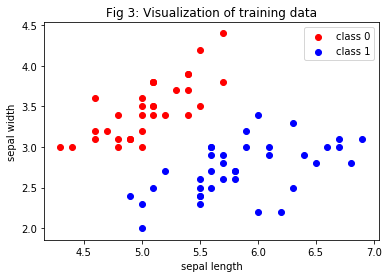

37

In [6]:
iris= datasets.load_iris()
X = iris.data[:,:2]
Y = iris.target
X = X[:100]
Y = Y[:100]
number_of_samples = len(Y)
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]
X_class0= np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==0])
Y_class0= np.zeros(X_class0.shape[0], dtype=np.int)
X_class1 = np.asarray([x_train[i] for i in range(len(x_train)) if y_train[i]==1])
Y_class1 = np.ones((X_class1.shape[0]),dtype=np.int)

plt.scatter(X_class0[:,0], X_class0[:,1],color='red')
plt.scatter(X_class1[:,0], X_class1[:,1],color='blue')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend(['class 0','class 1'])
plt.title('Fig 3: Visualization of training data')
plt.show()
X_class1.shape[0]

(1.5, 4.900000000000003)

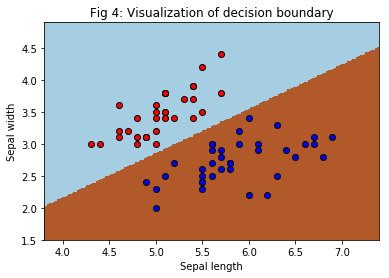

In [7]:
model = linear_model.LogisticRegression(C=1e5)
full_X=np.concatenate((X_class0,X_class1))
full_Y=np.concatenate((Y_class0,Y_class1))
model.fit(full_X,full_Y)
h=0.02
min_x, max_x = full_X[:,0].min() - 0.5 , full_X[:,0].max() + 0.5
min_y, max_y = full_X[:,1].min() - 0.5 , full_X[:,1].max() + 0.5
xx , yy = np.meshgrid(np.arange(min_x,max_x,h) , np.arange(min_y,max_y,h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X_class0[:, 0], X_class0[:, 1], c='red', edgecolors='k', cmap=plt.cm.Paired)
plt.scatter(X_class1[:, 0], X_class1[:, 1], c='blue', edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Fig 4: Visualization of decision boundary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


In [8]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,2)))[0] for i in range(x_val.shape[0])]
validation_misclassification_percentage = 0
for i in range(len(validation_set_predictions)):
    if validation_set_predictions[i] != y_val[i]:
        validation_misclassification_percentage += 1
validation_misclassification_percentage *= 100/len(y_val)
print ('validation misclassification percentage =', validation_misclassification_percentage, '%')

test_set_predictions = [model.predict(x_test[i].reshape((1,2)))[0] for i in range(x_test.shape[0])]

test_misclassification_percentage = 0
for i in range(len(test_set_predictions)):
    if test_set_predictions[i]!=y_test[i]:
        test_misclassification_percentage+=1
test_misclassification_percentage *= 100/len(y_test)
print ('test misclassification percentage =', test_misclassification_percentage, '%')
    

validation misclassification percentage = 6.666666666666667 %
test misclassification percentage = 0.0 %


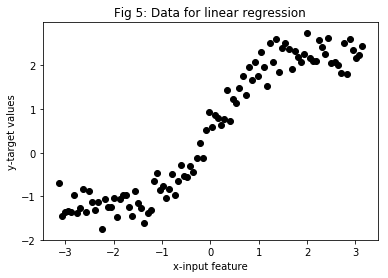

In [9]:
number_of_samples = 100
x = np.linspace(-np.pi, np.pi, number_of_samples)
y = 0.5*x+np.sin(x)+np.random.random(x.shape)
plt.scatter(x,y,color='black') #Plot y-vs-x in dots
plt.xlabel('x-input feature')
plt.ylabel('y-target values')
plt.title('Fig 5: Data for linear regression')
plt.show()

In [10]:
random_indices = np.random.permutation(number_of_samples)
#Training set
x_train = x[random_indices[:70]]
y_train = y[random_indices[:70]]
#Validation set
x_val = x[random_indices[70:85]]
y_val = y[random_indices[70:85]]
#Test set
x_test = x[random_indices[85:]]
y_test = y[random_indices[85:]]

In [11]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

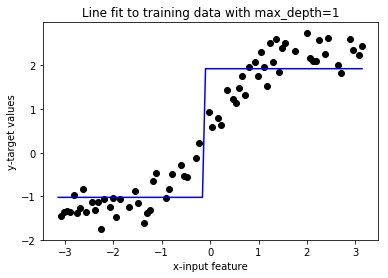

Training MSE:  0.271084873492 
Validation MSE:  0.405089624172 
Test MSE:  0.216335354696


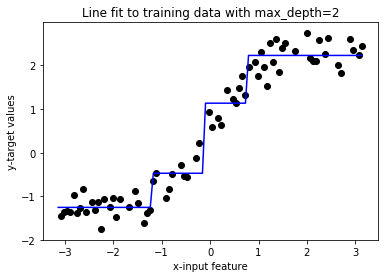

Training MSE:  0.0864364927956 
Validation MSE:  0.129985289 
Test MSE:  0.0588669931752


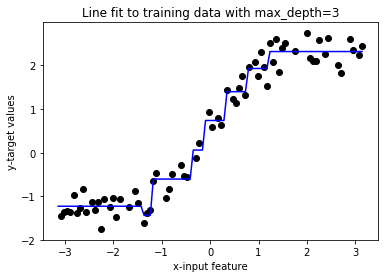

Training MSE:  0.0499139090338 
Validation MSE:  0.0972235980747 
Test MSE:  0.0638003523365


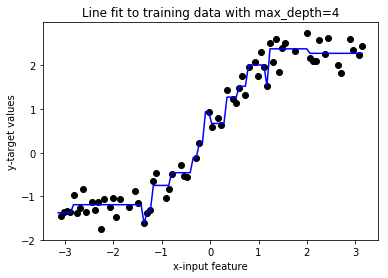

Training MSE:  0.0388509091825 
Validation MSE:  0.10709654962 
Test MSE:  0.0694158943196


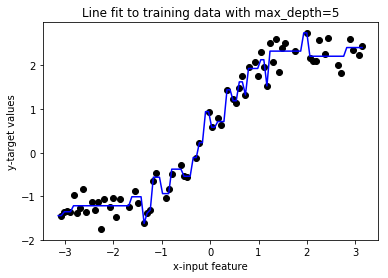

Training MSE:  0.0292647652498 
Validation MSE:  0.169093014042 
Test MSE:  0.080437878441


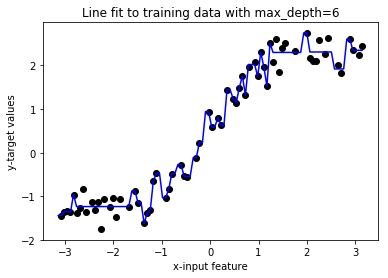

Training MSE:  0.0200986716626 
Validation MSE:  0.194666237027 
Test MSE:  0.102929537075


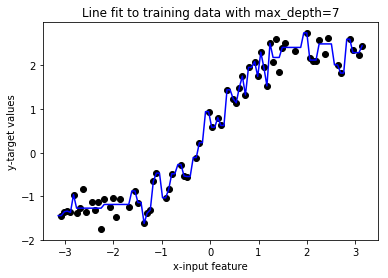

Training MSE:  0.0150712223635 
Validation MSE:  0.197202590138 
Test MSE:  0.122875666051


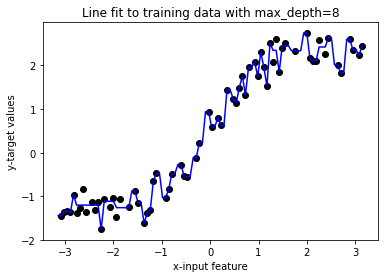

Training MSE:  0.00776998847766 
Validation MSE:  0.200897694162 
Test MSE:  0.122972564795


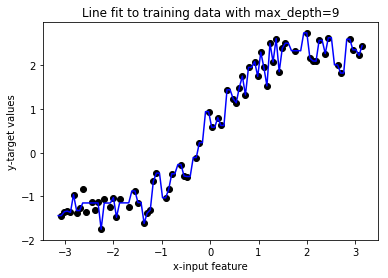

Training MSE:  0.00315633520467 
Validation MSE:  0.197507959927 
Test MSE:  0.119133174294


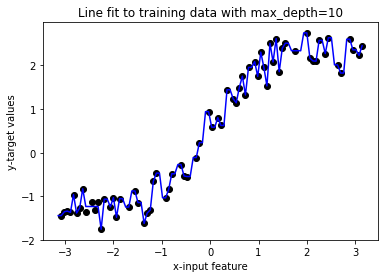

Training MSE:  0.000701557240494 
Validation MSE:  0.200389823663 
Test MSE:  0.122302697474


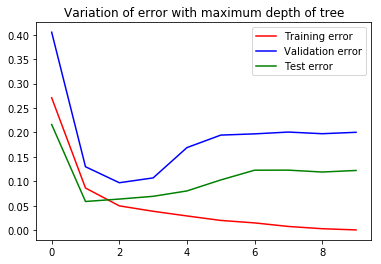

In [12]:
maximum_depth_of_tree = np.arange(10)+1
train_err_arr = []
val_err_arr = []
test_err_arr = []

for depth in maximum_depth_of_tree:
    
    model = tree.DecisionTreeRegressor(max_depth=depth)
    #sklearn takes the inputs as matrices. Hence we reshpae the arrays into column matrices
    x_train_for_line_fitting = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_line_fitting = np.matrix(y_train.reshape(len(y_train),1))

    #Fit the line to the training data
    model.fit(x_train_for_line_fitting, y_train_for_line_fitting)

    #Plot the line
    plt.figure()
    plt.scatter(x_train, y_train, color='black')
    plt.plot(x.reshape((len(x),1)),model.predict(x.reshape((len(x),1))),color='blue')
    plt.xlabel('x-input feature')
    plt.ylabel('y-target values')
    plt.title('Line fit to training data with max_depth='+str(depth))
    plt.show()
    
    mean_train_error = np.mean( (y_train - model.predict(x_train.reshape(len(x_train),1)))**2 )
    mean_val_error = np.mean( (y_val - model.predict(x_val.reshape(len(x_val),1)))**2 )
    mean_test_error = np.mean( (y_test - model.predict(x_test.reshape(len(x_test),1)))**2 )
    
    train_err_arr.append(mean_train_error)
    val_err_arr.append(mean_val_error)
    test_err_arr.append(mean_test_error)

    print ('Training MSE: ', mean_train_error, '\nValidation MSE: ', mean_val_error, '\nTest MSE: ', mean_test_error)
    
plt.figure()
plt.plot(train_err_arr,c='red')
plt.plot(val_err_arr,c='blue')
plt.plot(test_err_arr,c='green')
plt.legend(['Training error', 'Validation error', 'Test error'])
plt.title('Variation of error with maximum depth of tree')
plt.show()

In [13]:
iris = datasets.load_iris()
X = iris.data #Choosing only the first two input-features
Y = iris.target

number_of_samples = len(Y)
#Splitting into training, validation and test sets
random_indices = np.random.permutation(number_of_samples)
#Training set
num_training_samples = int(number_of_samples*0.7)
x_train = X[random_indices[:num_training_samples]]
y_train = Y[random_indices[:num_training_samples]]
#Validation set
num_validation_samples = int(number_of_samples*0.15)
x_val = X[random_indices[num_training_samples : num_training_samples+num_validation_samples]]
y_val = Y[random_indices[num_training_samples: num_training_samples+num_validation_samples]]
#Test set
num_test_samples = int(number_of_samples*0.15)
x_test = X[random_indices[-num_test_samples:]]
y_test = Y[random_indices[-num_test_samples:]]

In [14]:
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [15]:
import sys
!{sys.executable} -m pip install Graphviz
!{sys.executable} -m pip install pydot


    100% |████████████████████████████████| 51kB 3.0MB/s ta 0:00:01
You are using pip version 9.0.1, however version 22.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.1, however version 22.1.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [18]:
from sklearn.externals.six import StringIO
import pydot
import graphviz
from IPython.display import Image

dot_data = StringIO()
tree.export_graphviz(model, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
(graph, ) = pydot.graph_from_dot_data(dot_data.getvalue()) 


In [19]:
validation_set_predictions = [model.predict(x_val[i].reshape((1,len(x_val[i]))))[0] for i in range(x_val.shape[0])]
validation_set_predictions

[1, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0, 2, 1]

In [20]:
x_val.shape

(22, 4)